# Improving Medical Predictions by Irregular Multimodal Electronic Health Records Modeling

# Team and Repo
## Team Members:
- Franco E.Trujillo - fet2@illinois.edu
- Hongyi Wu - hongyiw6@illinois.edu

## Project Repo:
- [https://github.com/FrancoETrujillo/CS598_Final](https://github.com/FrancoETrujillo/CS598_Final)

## Reference Repos:
- [https://github.com/XZhang97666/MultimodalMIMIC](https://github.com/XZhang97666/MultimodalMIMIC)
    - commit hash used: 8e513ca
- [https://github.com/YerevaNN/mimic3-benchmarks](https://github.com/YerevaNN/mimic3-benchmarks)
    - commit hash used: ea0314c
- [https://github.com/kaggarwal/ClinicalNotesICU](https://github.com/kaggarwal/ClinicalNotesICU)
    - commit hash used: 9c2b740

# Introduction
This paper intends to address the challenges of handling irregularity and the integration of multimodal data for medical prediction tasks.

## Background of the problem
### What type of problem:
The paper focuses on 2 main problems; Mortality Prediction and Phenotype Classification
### What is the importance/meaning of solving the problem: 
ICUs admit patients with life-threatening conditions, Improving the efficacy and efficiency of predictions by accounting for irregular data in EHRs can help the medical providers to make more accurate and quick decisions that could save lives.

### What is the difficulty of the problem:
The primary difficulty is the handling the irregular sampling of data and the effective integration and modeling of EHR records like numerical time series and textual notes taken in multiple points in time and frequencies.

![EHR sample image](.img/sample_ehr.png)

### The state-of-the-art methods and effectiveness.
For irregular data handling;
> [1] Lipton, Z. C., Kale, D., and Wetzel, R. Directly modeling
> missing data in sequences with rnns: Improved classification of clinical time series. In Machine learning for
> healthcare conference, pp. 253–270. PMLR, 2016.

> [2] Shukla, S. N. and Marlin, B. M. Multi-time attention networks for irregularly sampled time series. arXiv preprint
> arXiv:2101.10318, 2021.

For irregular clinical notes processing;
> [3] Golmaei, S. N. and Luo, X. Deepnote-gnn: predicting hospital readmission using clinical notes and patient network.
> In Proceedings of the 12th ACM Conference on Bioinformatics, Computational Biology, and Health Informatics,
> pp. 1–9, 2021.

> [4]Mahbub, M., Srinivasan, S., Danciu, I., Peluso, A., Begoli, E., Tamang, S., and Peterson, G. D. 
> Unstructured clinical notes within the 24 hours since admission predict short,> mid & long-term mortality in adult icu patients. 
> Plos one, 17(1):e0262182, 2022.

## Paper explanation
### What did the paper propose
The general problem addressed in this paper is to find a better approach to handling irregular multimodal data obtained on EHRs to better assess real-time predictions in ICUs. 

### What is the innovations of the method
To better approach irregularity and multi-modal data the paper proposes integrating the real-time series and clinical notes while considering their irregularities. This by doing the following:

![High level arch](.img/high_arch_w_desc.png)

#### Modeling Irregularity in Time Series:
1. Temporal Discretization-Based Embeddings (TDE): Utilizes a novel unified
approach (UTDE) that combines:
    - Imputation: Regularizes time series by filling in missing values based
on prior observations or statistical methods.
    - Discretized Multi-Time Attention (mTAND): Applies a learned
interpolation method using a multi-time attention mechanism to
represent the irregular time series data better.
2. Unified Approach (UTDE): This approach integrates imputation and mTAND
through a gating mechanism to dynamically combine the representation of
the time series.
 
 ![Detail arch](.img/imputation_plus_mtand.png)

#### Processing Irregular Clinical Notes:
1. Text Encoding: Uses a pretrained model (TextEncoder) to encode clinical
notes into a series of representations.
2. Irregularity Modeling: Sorts these representations by time, treats them as
Multivariate Irregularly Sampled Time Series (MINSTS), and employs mTAND
to generate a set of text interpolation representations to handle irregularities.


#### Multimodal Fusion:
1. Interleaved Attention Mechanism: Fuses time series and clinical note
representations across temporal steps, integrating irregularity into multimodal
representations.
2. Self and Cross-Attention:
    - Multi-Head Self-Attention (MH): Acquires contextual embeddings for
each modality by focusing within the same modality across time.
    - Multi-Head Cross-Attention (CMH): Each modality learns from the
other, integrating information across modalities.
3. Feed-Forward and Prediction Layers: A feed-forward sublayer follows the
CMH outputs, with layer normalization and residual connections applied. The
final step involves passing the integrated representations through fully
connected layers to predict the outcome.


### How well the proposed method work (in its own metrics)
 The proposed methods for two medical prediction tasks consistently outperforms state-ofthe-art (SOTA) baselines in each single modality and multimodal fusion scenarios. 
Observing a relative improvements of 6.5%, 3.6%, and 4.3% in F1 for time series, clinical notes, and multimodal fusion, respectively. 

### What is the contribution to the reasearch regime (referring the Background above, how important the paper is to the problem).
The paper's contribution is important because it provides a new direction for EHR-based predictive models to consider time irregularity that could lead to more accurate and reliable medical predictions, helping patients and healthcare processes.

# Scope of Reproducibility:

For our project we plan to reproduce the experiment with In Hospital Mortality (IHM). And prove the following hypotheses:


1. The inclusion of UTDE improves the performance of the model.
2. Considering irregularities in clinical note embedding improves the performance of the model.
3. The introduction of UTDE and mTAND for processing time series and clinical notes, respectively, plus the integration of Multimodal fusion outperforms F1 score against standard baselines.

# Prerequisites to Reproduce the project
- Get access to the MIMIC dataset
- Modify the GlobalConfigs.py to use your own project and data paths
- Install the required dependencies listed on Requirements.txt, we recommend using Conda with python 3.11
- Modify the directory variables on the **Configuring imports and directories** section bellow if needed

**Notes:** 

- We are unable to share the preprocess pkl files due to the [MIMIC DUA](https://physionet.org/content/mimiciii/view-dua/1.4/)
- This project has being developed and tested using Linux Mint 21.2, ubuntu variants should work, but you may need to modify it to execute on another OS
- More information about our dir structure can be found on our README.md 
- For this project we've used an NVDIA 4070 GPU with a limited dataset, you may need more resources for your case.

# Methodology

The project reproduction consists on the following sections
- Data
- Models
- Training
- Evaluation

# Data

This paper uses the MIMICIII dataset as starting point to obtain timeseries information and medical notes. 

The MIMIC-III dataset is composed of a set of CSV files containing information about patients, their stays, events, and notes. 

For our project the most relevant tables are:
### ADMISSIONS
Contains information about the admissions of patients to the hospital.

![Admissions](.img/Addmissions_table.png)


### PATIENTS
Contains information about the patients.

![Patients](.img/patients_table.png)


### ICUSTAYS
Contains information about the ICU stays of patients.

![ICUStays](.img/icu_stays_table.png)


### NOTEEVENTS
Contains information about the notes taken for each patient.

![NoteEvents](.img/NoteEvents_table.png)


### CALLOUT
Contains information about when patients were ready for discharge (called out), and the actual time of their discharge (or more generally, their outcome).

![Callout](.img/callout_table.png)


More info about the table structures can be found at [https://mit-lcp.github.io/mimic-schema-spy/index.html](https://mit-lcp.github.io/mimic-schema-spy/index.html)


 
## Getting the data
 The following code contains some useful code to download and extract the dataset files locally
 
**Note**: To download the mimic dataset is necessary to complete the request for access at [Physionet](https://physionet.org/)

After downloading and extracting the dataset, we will have a directory structure like this:
```
├── ClinicalNotesICU
│   ├── models
│   └── scripts
├── mimic3-benchmarks
│   ├── data
│   │   ├── decompensation
│   │   ├── in-hospital-mortality
│   │   ├── length-of-stay
│   │   ├── multitask
│   │   ├── phenotyping
│   │   └── root
│   │       ├── test_text_fixed
│   │       └── text_fixed
│   ├── mimic3benchmark
│   │   ├── evaluation
│   │   ├── resources
│   │   ├── scripts
│   │   └── tests
│   │       └── resources
│   └── mimic3models
│       ├── decompensation
│       │   └── logistic
│       ├── in_hospital_mortality
│       │   └── logistic
│       ├── keras_models
│       ├── length_of_stay
│       │   └── logistic
│       ├── multitask
│       ├── phenotyping
│       │   └── logistic
│       └── resources
└── MultimodalMIMIC
    ├── Data
    │   ├── ihm
    │   └── irregular
    └── run
        └── TS_Text
```

## Config tasks to execute
Open and edit GlobalConfigs.py to set up the local path to the project.

In [1]:
import os
import pickle
# Imports and configs
import subprocess
from tqdm import tqdm

from GlobalConfigs import *

DOWNLOAD_DATASET = False
EXTRACT_COMPRESSED_CSVS = False
PREPROCESS_BENCHMARKS = False
PREPROCESS_CLINICAL_NOTES = False
PREPROCESS_MULTIMODAL = False

## Download dataset

In [2]:
# change physionet_username to your username
if DOWNLOAD_DATASET:

    physionet_username = "your_user_name"
    password = "your_pass"
    destination_directory = "data/MIMICIII_Original"

    command = [
        "wget", "-r", "-N", "-c", "-np",
        "--user", physionet_username,
        "--password", password,
        "https://physionet.org/files/mimiciii/1.4/",
        "-P", destination_directory
    ]

    process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)

    for line in process.stdout:
        print(line, end='')

    process.wait()

    if process.returncode != 0:
        print(f"Command failed with return code {process.returncode}")


In [3]:
if EXTRACT_COMPRESSED_CSVS:
    command = ['./decompress_mimic.sh', '-d', 'data/MIMICIII_Original/physionet.org/files/mimiciii/1.4/', '-o',
               'data/mimic3']

    process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)

    for line in process.stdout:
        print(line, end='')

    process.wait()

    if process.returncode != 0:
        print(f"Command failed with return code {process.returncode}")


# Preparing the data
The original paper leverages the following projects to help on the data preparation and extraction from the original MIMIC CSVs

It leverages the **mimic3-benchmarks** and the **ClinicalNotesICU** for the following:

- Cleanup invalid data
- Map the events, diagnoses, and stays for each patient.
- Extract timeseries for in-hospital-mortality 
- Split timeseries data into train and test sets
- Extract Medical notes for patients
- Split Medical notes for train and test sets

### MIMIC benchmarks
Helps to process timeseries data and divide train and test sets
[mimic3-benchmarks](https://github.com/YerevaNN/mimic3-benchmarks.git)

This repo contains a set of scripts that take the RAW mimic CSVs and prepare the irregular data:
- extract_subjects.py:
Generates one directory per SUBJECT_ID and writes ICU stay information to data/{SUBJECT_ID}/stays.csv, diagnoses to data/{SUBJECT_ID}/diagnoses.csv, and events to data/{SUBJECT_ID}/events.csv


- validate_events.py
Attempts to fix some issues (ICU stay ID is missing) and removes the events that have missing information. About 80% of events remain after removing all suspicious rows


- extract_episodes_from_subjects.py
Breaks up per-subject data into separate episodes (pertaining to ICU stays). Time series of events are stored in {SUBJECT_ID}/episode{#}_timeseries.csv (where # counts distinct episodes) while episode-level information (patient age, gender, ethnicity, height, weight) and outcomes (mortality, length of stay, diagnoses) are stores in {SUBJECT_ID}/episode{#}.csv. This script requires two files, one that maps event ITEMIDs to clinical variables and another that defines valid ranges for clinical variables


- split_train_and_test.py
Splits the whole dataset into training and testing sets.


- create_in_hospital_mortality.py
Generate task-specific datasets for in-hospital-mortality prediction

After running the preparation scripts we end up with a directory data/in-hospital-mortality we have two subdirectories: train and test. Each of them contains a bunch of ICU stays and one file with name listfile.csv, which lists all samples in that particular set. Each row of listfile.csv has the following form: icu_stay, period_length, label(s). A row specifies a sample for which the input is the collection of ICU event of icu_stay that occurred in the first period_length hours of the stay and the target are label(s). In in-hospital mortality prediction task period_length is always 48 hours.


The project does not work out of the box, so we downloaded the sourcecode and modify it inside this repo under the [mimic3-benchmarks](./mimic3-benchmarks) folder
To simplify the process we have created the following script `./build_benchmark_data.sh` to run all timeseries required tasks.



In [4]:
if PREPROCESS_BENCHMARKS:
    command = ["./build_benchmark_data.sh"]

    process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, shell=True)

    for line in process.stdout:
        print(line, end='')
    process.wait()

    if process.returncode != 0:
        print(f"Command failed with return code {process.returncode}")


### ClinicalNotesICU
Helps to process medical notes and divide in train and test
 [ClinicalNotesICU](https://github.com/kaggarwal/ClinicalNotesICU.git)

Similar to the mimic3-benchmarks, this repo contains a set of scripts that take the RAW mimic CSVs and process the clinical notes for the previously generated train and test datasets.

- extract_notes.py
Uses the NOTEEVENTS.csv and the previously generated train and test sets to extract the notes within the first 48 hours of the event and saves them on its own train a test data directories 

- extract_T0.py
Uses the stays.csv and events.csv to extract the episodes start time and save them into a binary pkl file.

The project does not work out of the box, so we downloaded the sourcecode and modify it inside this repo under the [ClinicalNotesICU](./ClinicalNotesICU) folder

To simplify the process we have created the following script `./extract_med_notes.sh` tu run all the required tasks for clinical notes.


In [5]:
if PREPROCESS_CLINICAL_NOTES:
    command = ["./extract_med_notes.sh"]

    process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, shell=True)

    for line in process.stdout:
        print(line, end='')
    process.wait()

    if process.returncode != 0:
        print(f"Command failed with return code {process.returncode}")

# Preprocess time series For Mimic Multimodal 
The next step is to discretize and normalize the timeseries data, as well as link the clinical notes with their corresponding timestamps.

The [paper's repo](https://github.com/XZhang97666/MultimodalMIMIC.git) provides a preprocessing script to work on this task.

After running the preprocessing steps we save the following PKLs to be used by the model: 
```
mean_std.pkl 
norm_ts_test.pkl
norm_ts_train.pkl
norm_ts_val.pkl
testp2x_data.pkl
trainp2x_data.pkl
ts_test.pkl
ts_train.pkl
ts_val.pkl
valp2x_data.pkl
```
The project does not work out of the box, so we used it partially to call some of the functions from this notebook; the downloaded sourcecode and modifications are inside this repo under the [MultimodalMIMIC](./MultimodalMIMIC) folder

# Configuring imports and directories

In [6]:
from typing import Optional
from dataclasses import dataclass


# Define ExperimentClass, this will help us to easy change the parameters and run multiple experiments reusing the same code
# as well as keep track and save the results
@dataclass
class ModelExperiment:
    tag: str
    epochs: int = 1
    max_text_length: int = 512
    n_samples: Optional[int] = 500  # None for full dataset
    imputation: str = "previous"  # 'zero', 'normal_value', 'previous', 'next'
    training_time_millis: Optional[int] = None
    eval_auc_results: Optional[dict] = None
    eval_f1_results: Optional[dict] = None
    eval_auprc_results: Optional[dict] = None


# Define predefined experiments, the naming convention is as follows: experiment{epochs}e{n_samples}s{imputation_strategy}
experiment1e1000sP = ModelExperiment(tag="experiment1e1000sP", epochs=1, n_samples=1000, imputation="previous")
experiment3e1000sP = ModelExperiment(tag="experiment3e1000sP", epochs=3, n_samples=1000, imputation="previous")
experiment6e1000sP = ModelExperiment(tag="experiment6e1000sP", epochs=6, n_samples=1000, imputation="previous")
experiment1e3000sP = ModelExperiment(tag="experiment1e3000sP", epochs=1, n_samples=3000, imputation="previous")
experiment3e3000sP = ModelExperiment(tag="experiment3e3000sP", epochs=3, n_samples=3000, imputation="previous")
experiment6e3000sP = ModelExperiment(tag="experiment6e3000sP", epochs=6, n_samples=3000, imputation="previous")
experiment1eFullP = ModelExperiment(tag="experiment1eFullP", epochs=1, n_samples=None, imputation="previous")
experiment6eFullP = ModelExperiment(tag="experiment6eFullP", epochs=6, n_samples=None, imputation="previous")
experiment3e3000sZ = ModelExperiment(tag="experiment3e3000sZ", epochs=3, n_samples=3000, imputation="zero")
experiment6e1000sZ = ModelExperiment(tag="experiment6e1000sZ", epochs=6, n_samples=1000, imputation="zero")


In [7]:
from mimic3benchmark.readers import InHospitalMortalityReader
from MultimodalMIMIC.preprocessing import Discretizer_multi
from typing import Optional, Any
from readers import Reader
import gzip
from mimic3models.preprocessing import Normalizer
from MultimodalMIMIC.preprocessing import extract_irregular
from MultimodalMIMIC.preprocessing import mean_std
from MultimodalMIMIC.preprocessing import normalize
from MultimodalMIMIC.text_utils import TextReader
from MultimodalMIMIC.preprocessing import merge_text_ts

GENERATE_PREPROCESSED_PKL = False # Change to True if the preprocessed pkl files are not available

# Paths for data
ihm_data_path = f"{BENCHMARKS_ROOT_PATH}/data/in-hospital-mortality"
ihm_train_data_path = f"{ihm_data_path}/train"
ihm_test_data_path = f"{ihm_data_path}/test"
discretizer_config_path = f"{MULTI_MODAL_MIMIC_PATH}/Data/irregular/discretizer_config.json"
channel_info_path = f"{MULTI_MODAL_MIMIC_PATH}/Data/irregular/channel_info.json"
textdata_fixed = f"{BENCHMARKS_ROOT_PATH}/data/root/text_fixed/train/"
text_start_time_path = f"{BENCHMARKS_ROOT_PATH}/data/root/text_fixed/starttime.pkl"
test_textdata_fixed = f"{BENCHMARKS_ROOT_PATH}/data/root/text_fixed/test/"
test_text_start_time_path = f"{BENCHMARKS_ROOT_PATH}/data/root/text_fixed/test_starttime.pkl"

current_experiment = experiment1e1000sP
sample_postfix = str(current_experiment.n_samples) if current_experiment.n_samples else "Full"
ihm_discrete_save_path = f"{MULTI_MODAL_MIMIC_PATH}/Data/ihm_{sample_postfix}_{current_experiment.imputation}"
output_path = f"ihm_{sample_postfix}_{current_experiment.imputation}"

# Modify this to take only a subset of the full data; None takes the full data
n_samples_elements = current_experiment.n_samples

mortality_period = 48
timestep = 1.0
imputation = "previous"
dataset_types = ["train", "val", "test"]

normalizer_state_file_path = f'{BENCHMARKS_ROOT_PATH}/mimic3models/in_hospital_mortality/ihm_ts{timestep}.input_str-previous.start_time-zero.normalizer'


Executing mimic multimodal preprocess


### Reading the data
First define the InHospitalMortalityReader to help us easily access the split datasets generated by mimic3-benchmarks. It provides helper functions to read multiple data series samples and labels by patient and map to a dictionary.

In [8]:
if GENERATE_PREPROCESSED_PKL:
    print(ihm_train_data_path)
    train_reader = InHospitalMortalityReader(dataset_dir=ihm_train_data_path,
                                             listfile=os.path.join(ihm_train_data_path, 'listfile.csv'),
                                             period_length=mortality_period)
    val_reader = InHospitalMortalityReader(dataset_dir=ihm_train_data_path,
                                           listfile=os.path.join(ihm_train_data_path, 'listfile.csv'),
                                           period_length=mortality_period)

    test_reader = InHospitalMortalityReader(dataset_dir=ihm_test_data_path,
                                            listfile=os.path.join(ihm_test_data_path, 'listfile.csv'),
                                            period_length=mortality_period)

In [9]:

def save_compressed_pkl_gz(data_to_dump: Any, save_name: str):
    print("saving and compressing:", save_name)
    with gzip.open(f'{save_name}.pkl.gz', 'wb') as file:
        pickle.dump(data_to_dump, file)


def load_compressed_pkl(full_file_name: str) -> Any:
    with gzip.open(full_file_name, 'rb') as file:
        data_loaded = pickle.load(file)
    return data_loaded


def read_chunk(reader, chunk_size):
    chunk_data = {}
    for _ in tqdm(range(chunk_size), desc="reading data"):
        ret = reader.read_next()
        for k, v in ret.items():
            if k not in chunk_data:
                chunk_data[k] = []
            chunk_data[k].append(v)
    chunk_data["header"] = chunk_data["header"][0]
    return chunk_data


def discretize_and_save_data(reader: Reader, discretizer: Discretizer_multi, save_path: str,
                             partial_n_samples: Optional[int] = None, save_name=str, compress_pkl: bool = False):
    n_samples = reader.get_number_of_examples()
    if partial_n_samples:
        n_samples = partial_n_samples
    ret = read_chunk(reader, n_samples)
    irg_data = ret["X"]
    ts = ret["t"]
    labels = ret["y"]
    discrete_names = ret["name"]

    reg_data = []
    for X, t in tqdm(zip(irg_data, ts), total=len(irg_data), desc=f"discretizing data "):
        transformed_data = discretizer.transform(X, end=t)[0]
        reg_data.append(transformed_data)

    os.makedirs(save_path, exist_ok=True)
    save_full_path = f"{save_path}/{save_name}"
    if compress_pkl:
        save_compressed_pkl_gz((irg_data, reg_data, labels, discrete_names), save_full_path)
    else:
        print("Saving", f"{save_full_path}.pkl")
        with open(f"{save_full_path}.pkl", 'wb') as file:
            pickle.dump((irg_data, reg_data, labels, discrete_names), file)


### Discretize temporal data and add imputation

In order to create the embeddings for the proposed model first we need to discretize and add the imputation to the missing values. In our case we will use imputation using the previous value of the series.

The Discretizer_multi takes care of transforming the irregular data into samples at each timestep while filling the missing data with the desired imputation strategy considering all time based features.

![Discretizer image](.img/only_discretize.png)


In [10]:
if GENERATE_PREPROCESSED_PKL:
    discretizer_multi = Discretizer_multi(
        impute_strategy=current_experiment.imputation,
        store_masks=True,
        start_time='zero',
        config_path=discretizer_config_path,
        channel_path=channel_info_path
    )
    discretizer_header = discretizer_multi.transform(train_reader.read_example(0)["X"])[1].split(',')
    cont_channels = [i for (i, x) in enumerate(discretizer_header) if x.find("->") == -1]

    print("discretize and save train")
    discretize_and_save_data(train_reader, discretizer_multi, ihm_discrete_save_path, n_samples_elements, "ts_train")
    print("discretize and save val")
    discretize_and_save_data(val_reader, discretizer_multi, ihm_discrete_save_path, n_samples_elements, "ts_val")
    print("discretize and save test")
    discretize_and_save_data(test_reader, discretizer_multi, ihm_discrete_save_path, n_samples_elements, "ts_test")

### Paddings and masks
After discretize we need to apply paddings and create masks for all features. For this we can use the function extract_irregular from MultimodalMimic. It creates the padded irregular and mask arrays and save them for later use. 

In [11]:
if GENERATE_PREPROCESSED_PKL:
    for dataset_type in dataset_types:
        print(f"Extracting {dataset_type} irregular data", flush=True)
        in_extract_data_path = f"{ihm_discrete_save_path}/ts_{dataset_type}.pkl"
        out_extract_data_path = f"{ihm_discrete_save_path}/ts_{dataset_type}.pkl"
        extract_irregular(in_extract_data_path, out_extract_data_path, channel_info_path, discretizer_config_path)


In [12]:
if GENERATE_PREPROCESSED_PKL:
    mean_std(f"{ihm_discrete_save_path}/ts_train.pkl", f"{ihm_discrete_save_path}/mean_std.pkl")


### Normalizing timeseries data
Now we apply normalization to our data by x = (x - means[f_idx]) / stds[f_idx], For this, we leverage the Normalizer provided by the mimic3-benchmarks repo


In [13]:
if GENERATE_PREPROCESSED_PKL:
    normalizer = Normalizer(fields=cont_channels)
    normalizer.load_params(normalizer_state_file_path)

    for dataset_type in dataset_types:
        print(f"Normalizing {dataset_type} times data", flush=True)
        normalize(f"{ihm_discrete_save_path}/ts_{dataset_type}.pkl",
                  f"{ihm_discrete_save_path}/norm_ts_{dataset_type}.pkl",
                  f"{ihm_discrete_save_path}/mean_std.pkl")

### Preparing the Text data
We finally prepare the text data within a period (48 in our case) and generate a json containing the note as well as the time until the end of the period. For this we use the TextReader helper from the MultimodalMIMIC module.

In [14]:

if GENERATE_PREPROCESSED_PKL:
    for dataset_type in dataset_types:
        print(f"Preparing  {dataset_type} text data", flush=True)

        with open(f"{ihm_discrete_save_path}/norm_ts_{dataset_type}.pkl", 'rb') as f:
            tsdata = pickle.load(f)

        names = [data['name'] for data in tsdata]

        if (dataset_type == 'train') or (dataset_type == 'val'):
            text_reader = TextReader(textdata_fixed, text_start_time_path)
        else:
            text_reader = TextReader(test_textdata_fixed, test_text_start_time_path)

        data_text, data_times, data_time = text_reader.read_all_text_append_json(names, mortality_period)
        merge_text_ts(data_text, data_times, data_time, tsdata, mortality_period,
                      f"{ihm_discrete_save_path}/{dataset_type}p2x_data.pkl")

### Preprocessing results
After running the preprocessing we will obtain the pkl files that will be used by the model for training and evaluation. The following cell will show the structure of the main pkl files.



In [15]:
def display_p2x_pkl_structure():
    print("Structure of the p2x pkl files")
    with open(f"{ihm_discrete_save_path}/testp2x_data.pkl", 'rb') as file:
        p2x_data = pickle.load(file)
        print(f"Keys p2x: {p2x_data[0].keys()}")

    with open(f"{ihm_discrete_save_path}/norm_ts_test.pkl", 'rb') as file:
        p2x_data = pickle.load(file)
        print(f"Keys norm: {p2x_data[0].keys()}")

    with open(f"{ihm_discrete_save_path}/mean_std.pkl", 'rb') as file:
        p2x_data = pickle.load(file)
        print(f"Keys mean_std tuple type : ({type(p2x_data[0])},{type(p2x_data[0])})")


display_p2x_pkl_structure()

Structure of the p2x pkl files
Keys p2x: dict_keys(['reg_ts', 'name', 'label', 'ts_tt', 'irg_ts', 'irg_ts_mask', 'text_data', 'text_time_to_end'])
Keys norm: dict_keys(['reg_ts', 'name', 'label', 'ts_tt', 'irg_ts', 'irg_ts_mask'])
Keys mean_std tuple type : (<class 'list'>,<class 'list'>)


# Train Model

## Import required modules and define helper functions

In [24]:
# Define helper functions to save and load experiments

def save_experiment(experiment: ModelExperiment, filename: str):
    # Convert the dataclass to a dictionary
    experiment_dict = asdict(experiment)

    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory)

    if os.path.exists(filename):
        with open(filename, 'r') as f:
            experiments = json.load(f)
    else:
        experiments = []

    experiments.append(experiment_dict)
    with open(filename, 'w') as f:
        json.dump(experiments, f, indent=4)

def load_experiment(filename: str):
    with open(filename) as f:
        experiment_dict = json.load(f)
        experiment = ModelExperiment(**experiment_dict[0])
        return experiment

def load_all_experiments(filename: str):
    with open(filename) as f:
        experiments_dict = json.load(f)
        experiments = [ModelExperiment(**experiment) for experiment in experiments_dict]
        return experiments
    
def save_eval_results(eval_result: dict, experiment: ModelExperiment, path: str = f"{PROJECT_BASE_PATH}/eval_results/experiments.json"):
    results = list(eval_result.values())[0]
    experiment.eval_auc_results = results["auc"]
    experiment.eval_f1_results = results["f1"]
    experiment.eval_auprc_results = results["auprc"]
    save_experiment(experiment, path)

In [25]:
import sys

from tensorboardX import SummaryWriter

import warnings
import logging

logger = logging.getLogger(__name__)
sys.path.insert(0, 'MultimodalMIMIC')
from GlobalConfigs import *
from MultimodalMIMIC.model import *
from MultimodalMIMIC.train import *
from MultimodalMIMIC.checkpoint import *
from accelerate import Accelerator
from MultimodalMIMIC.interp import *

## Set arguments

This step is to set up parameter to set up how to train and evaluate the model.

depending on the experiment defined above, the below code will set up the training params.

In [18]:
from MultimodalMIMIC.util import parse_args

parser = parse_args()
args = parser.parse_args(['--num_train_epochs', f'{current_experiment.epochs}',
                          '--train_batch_size', '2',
                          '--eval_batch_size', '8',
                          '--gradient_accumulation_steps', '16',
                          '--num_update_bert_epochs', '2',
                          '--notes_order', 'Last',
                          '--max_length', f'{current_experiment.max_text_length}',
                          '--output_dir', f'run/TS_Text/{output_path}',
                          '--embed_dim', '128',
                          '--model_name', 'bioLongformer',
                          '--file_path', f'{ihm_discrete_save_path}',
                          '--mixup_level', 'batch',
                          '--fp16',
                          '--irregular_learn_emb_text',
                          '--irregular_learn_emb_ts',
                          '--reg_ts'])

print(vars(args))

{'task': 'ihm', 'file_path': '/media/ftrujillo/FRD/Projects/UIUC/DLH/CS598_Final/MultimodalMIMIC/Data/ihm_1000_previous', 'output_dir': 'run/TS_Text/ihm_1000_previous', 'tensorboard_dir': None, 'seed': 42, 'mode': 'train', 'modeltype': 'TS_Text', 'eval_score': ['auc', 'auprc', 'f1'], 'num_labels': 2, 'max_length': 512, 'pad_to_max_length': False, 'model_path': None, 'train_batch_size': 2, 'eval_batch_size': 8, 'num_update_bert_epochs': 2, 'num_train_epochs': 1, 'txt_learning_rate': 5e-05, 'ts_learning_rate': 0.0004, 'gradient_accumulation_steps': 16, 'weight_decay': 0.01, 'lr_scheduler_type': 'linear', 'pt_mask_ratio': 0.15, 'mean_mask_length': 3, 'chunk': False, 'chunk_type': 'sent_doc_pos', 'warmup_proportion': 0.1, 'kernel_size': 1, 'num_heads': 8, 'layers': 3, 'cross_layers': 3, 'embed_dim': 128, 'irregular_learn_emb_ts': True, 'irregular_learn_emb_text': True, 'reg_ts': True, 'tt_max': 48, 'embed_time': 64, 'ts_to_txt': False, 'txt_to_ts': False, 'dropout': 0.1, 'model_name': 'bio

## Load model

load model from model python.
for full model implementation, check GitHub.

based on given argument model type, the below code will load one of two models.

- MULTCrossModel:
  - This is a multi-modal cross model. It combines both text and time series data. Depending on the configuration, it may employ Transformer encoders for processing time series data and apply attention mechanisms for processing text embeddings. The model integrates text and time series data at different levels using various fusion techniques such as self-cross attention or cross-modal fusion. Again, the output depends on the task (ihm or pheno), and appropriate loss functions are used accordingly.
- 
TSMixed
  - This is a mixed model for time series data. It combines interpolation techniques, such as S_Interp and Cross_Interp, with Transformer-based encoders or other models like LSTM or CNN for processing time series data. It handles mixed-level data, such as batch-level, sequence-level, or feature-level mixup, and outputs predictions based on the task (ihm or pheno).

![high level arch with desc](.img/high_arch_w_desc.png)

In [19]:
def get_model(args, device, BioBert):
    if 'Text' in args.modeltype:
        return MULTCrossModel(args=args, device=device, orig_d_ts=17, orig_reg_d_ts=34, orig_d_txt=768,
                               ts_seq_num=args.tt_max, text_seq_num=args.num_of_notes, Biobert=BioBert)
    else:
        return TSMixed(args=args, device=device, orig_d_ts=17, orig_reg_d_ts=34, ts_seq_num=args.tt_max)

## Train

This part of code train model, set up optimizer, prepare training environment and run the training process. 
Given modeltype argument from above, it will set optimizer for different model type. (Text, Timeseries or mix)

In [20]:

from MultimodalMIMIC.data import data_perpare
from MultimodalMIMIC.util import loadBert
import time


# eval_result = eval_test(args, model, test_data_loader, device)

def prepare_trining_eval(args):
    """
    This function encasulates the training process plus the setup from the previous cells to be reused in later experiments.
    """

    # Set up training environment based on given argument above

    if args.fp16:
        args.mixed_precision = "fp16"
    else:
        args.mixed_precision = "no"
    accelerator = Accelerator(mixed_precision=args.mixed_precision, cpu=args.cpu)

    device = accelerator.device
    print(f'device: {device}')
    os.makedirs(args.output_dir, exist_ok=True)
    if args.tensorboard_dir != None:
        writer = SummaryWriter(args.tensorboard_dir)
    else:
        writer = None

    warnings.filterwarnings('ignore')
    logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s - %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,
    )

    if args.seed is not None:
        set_seed(args.seed)

    make_save_dir(args)

    if args.seed == 0:
        copy_file(args.ck_file_path + 'model/', src=os.getcwd())

    # Load training, validation and test dataset.
    if args.mode == 'train':
        if 'Text' in args.modeltype:
            BioBert, BioBertConfig, tokenizer = loadBert(args, device)
        else:
            BioBert, tokenizer = None, None
        train_dataset, train_sampler, train_dataloader = data_perpare(args, 'train', tokenizer)
        val_dataset, val_sampler, val_dataloader = data_perpare(args, 'val', tokenizer)
        _, _, test_data_loader = data_perpare(args, 'test', tokenizer)

    # get model
    model = get_model(args, device, BioBert)

    #define optimizer
    if args.modeltype == 'TS':
        optimizer = torch.optim.Adam(model.parameters(), lr=args.ts_learning_rate)
    elif args.modeltype == 'Text' or args.modeltype == 'TS_Text':
        optimizer = torch.optim.Adam([
            {'params': [p for n, p in model.named_parameters() if 'bert' not in n]},
            {'params': [p for n, p in model.named_parameters() if 'bert' in n], 'lr': args.txt_learning_rate}
        ], lr=args.ts_learning_rate)
    else:
        raise ValueError("Unknown modeltype in optimizer.")

    model, optimizer, train_dataloader, val_dataloader, test_data_loader = \
        accelerator.prepare(model, optimizer, train_dataloader, val_dataloader, test_data_loader)

    return model, optimizer, train_dataloader, val_dataloader, test_data_loader, device, accelerator, writer


start_time = time.time()

model, optimizer, train_dataloader, val_dataloader, test_data_loader, device, accelerator, writer = prepare_trining_eval(
    args)

trainer_irg(model=model, args=args, accelerator=accelerator, train_dataloader=train_dataloader,
            dev_dataloader=val_dataloader, test_data_loader=test_data_loader, device=device,
            optimizer=optimizer, writer=writer)

end_time = time.time()
current_experiment.training_time_millis = (end_time - start_time) * 1000
print(f"Training time: {current_experiment.training_time_millis} ms")


device: cuda
run/TS_Text/ihm_1000_previous/ihm/TS_Text/TS_48/Atten/Text_48/bioLongformer/512/cross_attn3/irregular_TS_64/irregular_Text_64/5e-05_2_3_0.0004_1_8_128_1_2/


Some weights of LongformerModel were not initialized from the model checkpoint at yikuan8/Clinical-Longformer and are newly initialized: ['longformer.pooler.dense.bias', 'longformer.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Franco Trying to load: /media/ftrujillo/FRD/Projects/UIUC/DLH/CS598_Final/MultimodalMIMIC/Data/ihm_1000_previous/trainp2x_data.pkl
Using /media/ftrujillo/FRD/Projects/UIUC/DLH/CS598_Final/MultimodalMIMIC/Data/ihm_1000_previous/trainp2x_data.pkl
Franco Trying to load: /media/ftrujillo/FRD/Projects/UIUC/DLH/CS598_Final/MultimodalMIMIC/Data/ihm_1000_previous/valp2x_data.pkl
Using /media/ftrujillo/FRD/Projects/UIUC/DLH/CS598_Final/MultimodalMIMIC/Data/ihm_1000_previous/valp2x_data.pkl
Franco Trying to load: /media/ftrujillo/FRD/Projects/UIUC/DLH/CS598_Final/MultimodalMIMIC/Data/ihm_1000_previous/testp2x_data.pkl
Using /media/ftrujillo/FRD/Projects/UIUC/DLH/CS598_Final/MultimodalMIMIC/Data/ihm_1000_previous/testp2x_data.pkl


  0%|          | 0/1 [00:00<?, ?it/s]

0 False



0it [00:00, ?it/s]
1it [00:00,  1.40it/s]Input ids are automatically padded from 485 to 512 to be a multiple of `config.attention_window`: 512

2it [00:01,  2.16it/s]
3it [00:01,  2.43it/s]Input ids are automatically padded from 311 to 512 to be a multiple of `config.attention_window`: 512

4it [00:01,  2.91it/s]
5it [00:01,  2.84it/s]
6it [00:02,  3.04it/s]
7it [00:02,  3.08it/s]
8it [00:02,  3.21it/s]
9it [00:03,  3.49it/s]
10it [00:03,  3.66it/s]Input ids are automatically padded from 3 to 512 to be a multiple of `config.attention_window`: 512

11it [00:03,  3.33it/s]
12it [00:03,  3.53it/s]
13it [00:04,  3.69it/s]Input ids are automatically padded from 468 to 512 to be a multiple of `config.attention_window`: 512

14it [00:04,  3.40it/s]
15it [00:04,  3.27it/s]
16it [00:05,  2.72it/s]
17it [00:05,  3.02it/s]Input ids are automatically padded from 313 to 512 to be a multiple of `config.attention_window`: 512

18it [00:05,  3.28it/s]
19it [00:06,  3.48it/s]Input ids are automaticall

Current auc 0.8100546505151768
Best auc 0.8100546505151768
Current auprc 0.4268401493767072
Best auprc 0.4268401493767072
Current f1 0.3725490196078431
Best f1 0.3725490196078431
Training time: 242957.1259021759 ms


# Evaluate

In [21]:
import json
from dataclasses import asdict

start_time = time.time()

eval_result = eval_test(args, model, test_data_loader, device)
save_eval_results(eval_result, current_experiment)

end_time = time.time()
current_experiment.training_time_millis = (end_time - start_time) * 1000
print(f"Evaluation time: {current_experiment.training_time_millis} ms")


run/TS_Text/ihm_1000_previous/ihm/TS_Text/TS_48/Atten/Text_48/bioLongformer/512/cross_attn3/irregular_TS_64/irregular_Text_64/5e-05_2_3_0.0004_1_8_128_1_2/f1/42.pth.tar


100%|██████████| 125/125 [01:50<00:00,  1.13it/s]

Evaluation time: 111174.69573020935 ms


## Load evaluation results

The performance of proposed methods and baselines are measured by the F1, AUPR, and AUROC

In [22]:
print(f"Experiment eval result: {current_experiment.tag} - {current_experiment.eval_f1_results}")

{42: {'auc': {'val': 0.8100546505151768, 'test': 0.7846925133689839}, 'auprc': {'val': 0.4268401493767072, 'test': 0.3548482107937788}, 'f1': {'val': 0.3725490196078431, 'test': 0.26666666666666666}}}


# Experiment Results 

Since for the demonstration we only used 1000 sample for 1 epoch, and we fill in dummy data for entry with missing value, we could not achieve the same result as the paper describe.

We plan to further furnish the code and run on the full sample data with more epoch, to see if we could get the result as the paper describe.

Table of results (no need to include additional experiments, but main reproducibility result should be included)
Create table and graph comparing different params (n epochs, etc.)
All claims should be supported by experiment results
Discuss with respect to the hypothesis and results from the original paper
Experiments beyond the original paper
Each experiment should include results and a discussion
Ablation Study.


## Comparison between Hyperparameters

| Experiment         | N samples    | Epochs | Imputation |
|--------------------|--------------|--------|------------|
| experiment1e1000sP | 1000 samples | 1      | previous   |
| experiment3e1000sP | 1000 samples | 3      | previous   |
| experiment6e1000sP | 1000 samples | 6      | previous   |
| experiment1e3000sP | 3000 samples | 1      | previous   |
| experiment3e3000sP | 3000 samples | 3      | previous   |
| experiment6e3000sP | 3000 samples | 6      | previous   |
| experiment1eFullP  | Full Dataset | 1      | previous   |
| experiment6eFullP  | Full Dataset | 6      | previous   |
| experiment3e3000sZ | 3000 samples | 3      | zero       |
| experiment6e1000sZ | 1000 samples | 6      | zero       |

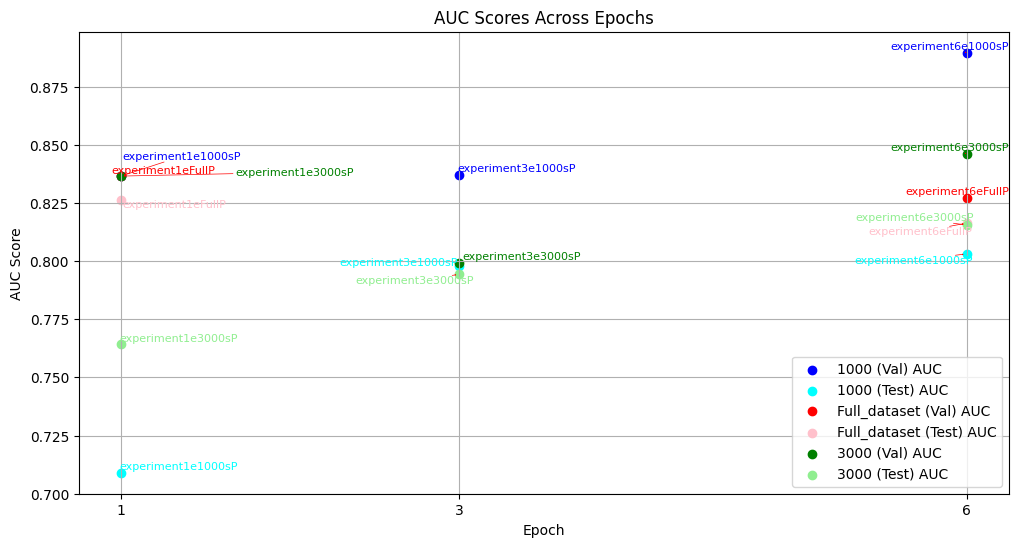

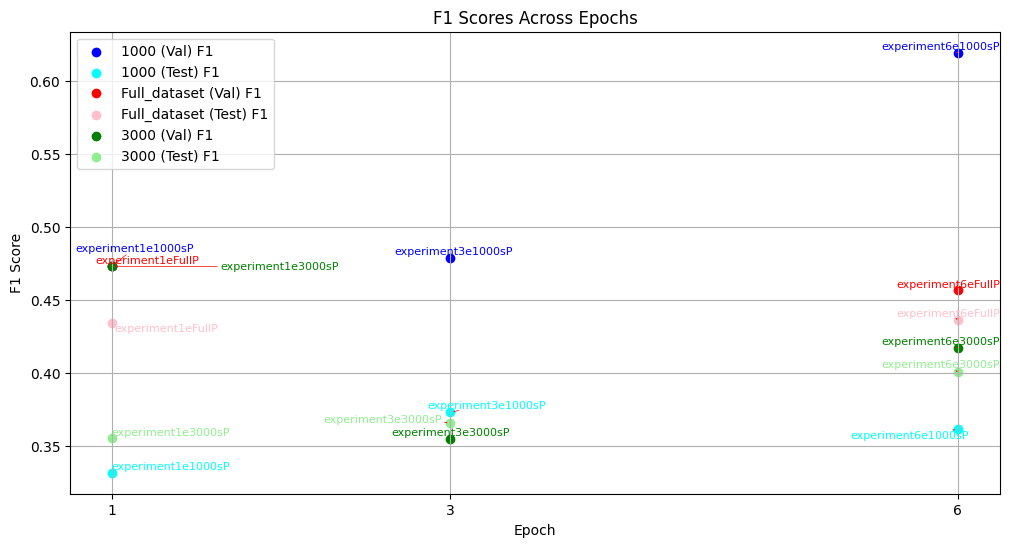

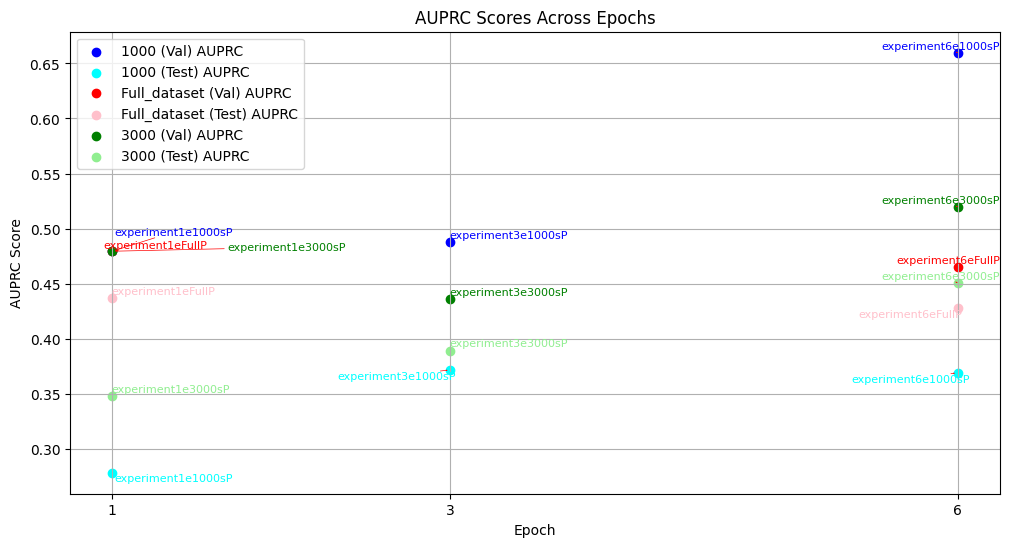

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text

def experiments_to_dataframe(experiments) -> pd.DataFrame:
    rows = []
    for exp in experiments:
        n_samples_label = "1000" if exp.n_samples == 1000 else "3000" if exp.n_samples == 3000 else "Full_dataset"
        for res_type in ["auc", "f1", "auprc"]:
            res_dict = getattr(exp, f"eval_{res_type}_results")
            if res_dict:
                rows.append({
                    "Tag": exp.tag,
                    "Epoch": exp.epochs,
                    "Type": res_type.upper(),
                    "Val": res_dict["val"],
                    "Test": res_dict["test"],
                    "Dataset_Size": n_samples_label,
                })
    return pd.DataFrame(rows)

def plot_comparison_chart(df: pd.DataFrame, score_type: str):
    # Subset for the given score type
    df_sub = df[(df["Type"] == score_type) & (df["Epoch"] > 0)]

    # Define a dictionary mapping dataset sizes to specific colors
    dataset_colors = {
        "1000": ("blue", "cyan"),
        "3000": ("green", "lightgreen"),
        "Full_dataset": ("red", "pink"),
    }

    # Create the scatter plot
    plt.figure(figsize=(12, 6))
    texts = []

    for dataset in df_sub["Dataset_Size"].unique():
        df_ds = df_sub[df_sub["Dataset_Size"] == dataset]

        val_color, test_color = dataset_colors[dataset]
        plt.scatter(df_ds["Epoch"], df_ds["Val"], label=f"{dataset} (Val) {score_type}", color=val_color)
        plt.scatter(df_ds["Epoch"], df_ds["Test"], label=f"{dataset} (Test) {score_type}", color=test_color)

        # Collect tags as annotations
        for i, row in df_ds.iterrows():
            texts.append(plt.text(row["Epoch"], row["Val"], row["Tag"], fontsize=8, ha="right", color=val_color))
            texts.append(plt.text(row["Epoch"], row["Test"], row["Tag"], fontsize=8, ha="right", color=test_color))

    adjust_text(texts, pull_threshold=2, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

    plt.legend()
    plt.title(f"{score_type} Scores Across Epochs")
    plt.xlabel("Epoch")
    plt.ylabel(f"{score_type} Score")
    plt.xticks(df_sub["Epoch"].unique())
    plt.grid()
    plt.show()

# Load and process the experiments
experiments = load_all_experiments(f"{PROJECT_BASE_PATH}/eval_results/experiments.json")

# Remove elements which tag ends in Z
experiments = [exp for exp in experiments if not exp.tag.endswith("Z")]
df = experiments_to_dataframe(experiments)

# Plot each chart, val and test combined
plot_comparison_chart(df, "AUC")
plot_comparison_chart(df, "F1")
plot_comparison_chart(df, "AUPRC")


## Ablation study


For our project we plan to reproduce the experiment with In Hospital Mortality (IHM). 
In our ablation study, we want to find out 
- if the inclusion of imputation with UTDE improves the performance of the model.
- if the introduction of mTand improves the performance of the model.

Thus we plan to run training and evaluation on the below three control/test groups:

1. Control group
- Time series: "previous" imputation + mTand(ts) + UTDE gate
- Text: Textencoder + mTand(txt)
- multimodal fusion

<!-- 2. Test1: Drop imputation by setting missing value to zero to prove the benefit of the imputation and UTDE approach.
- Time series: "zero" imputation + mTand(ts) + UTDE gate
- Text: Textencoder + mTand(txt)
- multimodal fusion
MULTCrossModel false true -->

3. Test2: Drop mTAND from processing to prove the impact of considering irregularity during embedding.
- Time series: "previous" imputation + UTDE gate
- Text: Textencoder
- multimodal fusion
 MULTCrossModel false false

### Evaluation metrics:
- AUPR
- AUROC
- F1

### Shared data and hyper parameter 
- 48 hour IHM data
- number of sample data: 3000
- training epoch: 6

In [53]:
def train_and_eval(experiment, args):
    if args.fp16:
        args.mixed_precision = "fp16"
    else:
        args.mixed_precision = "no"
    accelerator = Accelerator(mixed_precision=args.mixed_precision, cpu=args.cpu)

    device = accelerator.device
    print(f'device: {device}')
    os.makedirs(args.output_dir, exist_ok=True)
    if args.tensorboard_dir != None:
        writer = SummaryWriter(args.tensorboard_dir)
    else:
        writer = None

    warnings.filterwarnings('ignore')
    logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s - %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,
    )

    if args.seed is not None:
        set_seed(args.seed)

    output_path = make_save_dir(args)

    if args.seed == 0:
        copy_file(args.ck_file_path + 'model/', src=os.getcwd())

    # load data

    from MultimodalMIMIC.data import data_perpare
    from MultimodalMIMIC.util import loadBert

    if args.mode == 'train':
            if 'Text' in args.modeltype:
                BioBert, BioBertConfig, tokenizer = loadBert(args, device)
            else:
                BioBert, tokenizer = None, None
            train_dataset, train_sampler, train_dataloader = data_perpare(args, 'train', tokenizer)
            val_dataset, val_sampler, val_dataloader = data_perpare(args, 'val', tokenizer)
            _, _, test_data_loader = data_perpare(args, 'test', tokenizer)

    # load model
    if 'Text' in args.modeltype:
        model = MULTCrossModel(args=args, device=device, orig_d_ts=17, orig_reg_d_ts=34, orig_d_txt=768,
                            ts_seq_num=args.tt_max, text_seq_num=args.num_of_notes, Biobert=BioBert)
    else:
        model = TSMixed(args=args, device=device, orig_d_ts=17, orig_reg_d_ts=34, ts_seq_num=args.tt_max)

    # train model
    if args.modeltype == 'TS':
            optimizer = torch.optim.Adam(model.parameters(), lr=args.ts_learning_rate)
    elif args.modeltype == 'Text' or args.modeltype == 'TS_Text':
        optimizer = torch.optim.Adam([
            {'params': [p for n, p in model.named_parameters() if 'bert' not in n]},
            {'params': [p for n, p in model.named_parameters() if 'bert' in n], 'lr': args.txt_learning_rate}
        ], lr=args.ts_learning_rate)
    else:
        raise ValueError("Unknown modeltype in optimizer.")

    model, optimizer, train_dataloader, val_dataloader, test_data_loader = \
        accelerator.prepare(model, optimizer, train_dataloader, val_dataloader, test_data_loader)

    trainer_irg(model=model, args=args, accelerator=accelerator, train_dataloader=train_dataloader, \
                dev_dataloader=val_dataloader, test_data_loader=test_data_loader, device=device, \
                optimizer=optimizer, writer=writer)

    # eval model
    eval_result = eval_test(args, model, test_data_loader, device)

    for result_file in os.listdir(args.ck_file_path):
        if 'result.pkl' in result_file:
            eval_result_path = args.ck_file_path + result_file
            # print(eval_result_path)
            with open(eval_result_path,'rb') as f:
                evaluation_result = pickle.load(f)
                print(evaluation_result)

    return eval_result


In [54]:
def set_experiment(current_experiment, mtand, fusion_strategy='interleaved'):
    sample_postfix = str(current_experiment.n_samples) if current_experiment.n_samples else "Full"
    ihm_discrete_save_path = f"{MULTI_MODAL_MIMIC_PATH}/Data/ihm_{sample_postfix}_{current_experiment.imputation}"
    output_path = f"ihm_{sample_postfix}_{current_experiment.imputation}"

    parser = parse_args()

    args = parser.parse_args(['--num_train_epochs', f'{current_experiment.epochs}',
                              '--train_batch_size', '2',
                              '--eval_batch_size', '8',
                              '--gradient_accumulation_steps', '16',
                              '--num_update_bert_epochs', '2',
                              '--notes_order', 'Last',
                              '--max_length', f'{current_experiment.max_text_length}',
                              '--output_dir', f'run/TS_Text/{output_path}',
                              '--embed_dim', '128',
                              '--model_name', 'bioLongformer',
                              '--file_path', f'{ihm_discrete_save_path}',
                              '--mixup_level', 'batch',
                              '--fp16',
                              '--reg_ts'])
    if mtand:
        args.irregular_learn_emb_text = True
        args.irregular_learn_emb_ts = True

    if fusion_strategy != 'interleaved':
        args.self_cross = False
        args.cross_method = fusion_strategy

    return args


### Control

Train and evaluate model follow the original set up from paper.
- Time series: "previous" imputation and mTand(ts), combined with UTDE
- Clinical notes: text encoder + mTand(txt)
- Combined result of above two with MultiModal fusion 

Skip training and eval since we have run this setting in previous training section.
Will just load eval result from file.

In [55]:
experiment_control = load_experiment("eval_results/experiment_control.json")
print(experiment_control)

ModelExperiment(tag='experiment6e3000sP', epochs=6, max_text_length=512, n_samples=3000, imputation='previous', training_time_millis=None, eval_auc_results={'val': 0.8459165381649961, 'test': 0.8161479254699427}, eval_f1_results={'val': 0.39522998296422485, 'test': 0.3985239852398524}, eval_auprc_results={'val': 0.5156741842572563, 'test': 0.4514660643879602})


### Test1: Use MAGgate fusion instead of Interleave fusion

Train and evaluate model using "MAGgate" fusion strategy
- Time series: "previous" imputation and mTand(ts), combined with UTDE
- Clinical notes: text encoder + mTand(txt)
- Combined result of above two with MAGgate fusion

In [57]:
experiment_test1 = ModelExperiment(tag="experiment6e3000sP", epochs=1, n_samples=3000, imputation="previous")
args = set_experiment(experiment_test1, mtand=True, fusion_strategy='MAGgate')
print(vars(args))
eval_result = train_and_eval(experiment_test1, args)
save_eval_results(eval_result, experiment_test1, f"{PROJECT_BASE_PATH}/eval_results/experiment_test1.json")
print(experiment_test1)

{'task': 'ihm', 'file_path': '/media/ftrujillo/FRD/Projects/UIUC/DLH/CS598_Final/MultimodalMIMIC/Data/ihm_3000_previous', 'output_dir': 'run/TS_Text/ihm_3000_previous', 'tensorboard_dir': None, 'seed': 42, 'mode': 'train', 'modeltype': 'TS_Text', 'eval_score': ['auc', 'auprc', 'f1'], 'num_labels': 2, 'max_length': 512, 'pad_to_max_length': False, 'model_path': None, 'train_batch_size': 2, 'eval_batch_size': 8, 'num_update_bert_epochs': 2, 'num_train_epochs': 1, 'txt_learning_rate': 5e-05, 'ts_learning_rate': 0.0004, 'gradient_accumulation_steps': 16, 'weight_decay': 0.01, 'lr_scheduler_type': 'linear', 'pt_mask_ratio': 0.15, 'mean_mask_length': 3, 'chunk': False, 'chunk_type': 'sent_doc_pos', 'warmup_proportion': 0.1, 'kernel_size': 1, 'num_heads': 8, 'layers': 3, 'cross_layers': 3, 'embed_dim': 128, 'irregular_learn_emb_ts': True, 'irregular_learn_emb_text': True, 'reg_ts': True, 'tt_max': 48, 'embed_time': 64, 'ts_to_txt': False, 'txt_to_ts': False, 'dropout': 0.1, 'model_name': 'bio

Some weights of LongformerModel were not initialized from the model checkpoint at yikuan8/Clinical-Longformer and are newly initialized: ['longformer.pooler.dense.bias', 'longformer.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Franco Trying to load: /media/ftrujillo/FRD/Projects/UIUC/DLH/CS598_Final/MultimodalMIMIC/Data/ihm_3000_previous/trainp2x_data.pkl
Using /media/ftrujillo/FRD/Projects/UIUC/DLH/CS598_Final/MultimodalMIMIC/Data/ihm_3000_previous/trainp2x_data.pkl
Franco Trying to load: /media/ftrujillo/FRD/Projects/UIUC/DLH/CS598_Final/MultimodalMIMIC/Data/ihm_3000_previous/valp2x_data.pkl
Using /media/ftrujillo/FRD/Projects/UIUC/DLH/CS598_Final/MultimodalMIMIC/Data/ihm_3000_previous/valp2x_data.pkl
Franco Trying to load: /media/ftrujillo/FRD/Projects/UIUC/DLH/CS598_Final/MultimodalMIMIC/Data/ihm_3000_previous/testp2x_data.pkl
Using /media/ftrujillo/FRD/Projects/UIUC/DLH/CS598_Final/MultimodalMIMIC/Data/ihm_3000_previous/testp2x_data.pkl


  0%|          | 0/1 [00:00<?, ?it/s]

0 False



0it [00:00, ?it/s]
1it [00:00,  3.41it/s]
2it [00:00,  3.59it/s]
3it [00:00,  3.67it/s]
4it [00:01,  3.40it/s]
5it [00:01,  3.29it/s]
6it [00:01,  3.34it/s]
7it [00:02,  3.52it/s]
8it [00:02,  3.63it/s]
9it [00:02,  3.68it/s]
10it [00:02,  3.76it/s]
11it [00:03,  3.83it/s]
12it [00:03,  3.87it/s]
13it [00:03,  3.86it/s]
14it [00:03,  3.81it/s]
15it [00:04,  3.83it/s]
16it [00:04,  3.86it/s]
17it [00:04,  3.77it/s]
18it [00:04,  3.69it/s]
19it [00:05,  3.73it/s]
20it [00:05,  3.75it/s]
21it [00:05,  3.80it/s]
22it [00:05,  3.78it/s]
23it [00:06,  3.84it/s]
24it [00:06,  3.72it/s]
25it [00:06,  3.74it/s]
26it [00:07,  3.70it/s]
27it [00:07,  3.70it/s]
28it [00:07,  3.72it/s]Input ids are automatically padded from 345 to 512 to be a multiple of `config.attention_window`: 512

29it [00:07,  3.47it/s]
30it [00:08,  3.45it/s]Input ids are automatically padded from 372 to 512 to be a multiple of `config.attention_window`: 512

31it [00:08,  3.56it/s]Input ids are automatically padded from 45

KeyboardInterrupt: 

### Test2: Drop mTAND from processing to prove the impact of considering irregularity during embedding.

Train and evaluate model dropping "mTand" module.
- Time series: "previous" imputation
- Clinical notes: text encoder
- Combined result of above two with MultiModal fusion

Drop mTand by set these arguments:
- 'irregular_learn_emb_ts': False, 
- 'irregular_learn_emb_text': False

In [ ]:
experiment_test2 = ModelExperiment(tag="experiment6e3000sP", epochs=1, n_samples=3000, imputation="previous")
args = set_experiment(experiment_test2, mtand=False)
print(vars(args))
eval_result = train_and_eval(experiment_test2, args)
save_eval_results(eval_result, experiment_test2, f"{PROJECT_BASE_PATH}/eval_results/experiment_test2.json")
print(experiment_test2)


In [ ]:
from py_markdown_table.markdown_table import markdown_table
from IPython.display import display, Markdown

experiment_control = load_experiment("eval_results/experiment_control.json")
experiment_test1 = load_experiment("eval_results/experiment_test1.json")
experiment_test2 = load_experiment("eval_results/experiment_test2.json")

data = [
    {"test group": "Control",
     "val accuracy": round(experiment_control.eval_auc_results['val'],4),
     "val AUPRC": round(experiment_control.eval_auprc_results['val'],4),
     "val F1": round(experiment_control.eval_f1_results['val'],4),
     "test accuracy": round(experiment_control.eval_auc_results['test'],4),
     "test AUPRC": round(experiment_control.eval_auprc_results['test'],4),
     "test F1": round(experiment_control.eval_f1_results['test'],4)},

     {"test group": "Test1: use MAGgate fusion instead of interleaved fusion",
     "val accuracy": round(experiment_test1.eval_auc_results['val'],4),
     "val AUPRC": round(experiment_test1.eval_auprc_results['val'],4),
     "val F1": round(experiment_test1.eval_f1_results['val'],4),
     "test accuracy": round(experiment_test1.eval_auc_results['test'],4),
     "test AUPRC": round(experiment_test1.eval_auprc_results['test'],4),
     "test F1": round(experiment_test1.eval_f1_results['test'],4)},

     {"test group": "Test2: drop mTand",
     "val accuracy": round(experiment_test2.eval_auc_results['val'],4),
     "val AUPRC": round(experiment_test2.eval_auprc_results['val'],4),
     "val F1": round(experiment_test2.eval_f1_results['val'],4),
     "test accuracy": round(experiment_test2.eval_auc_results['test'],4),
     "test AUPRC": round(experiment_test2.eval_auprc_results['test'],4),
     "test F1": round(experiment_test2.eval_f1_results['test'],4)},
]

markdown = markdown_table(data).get_markdown()
display(Markdown(markdown))

### Ablation conclusion

Given the above ablation study experiment results, we can see that:
- the use of interleaved fusion has better performance than MAGgate in some metrics. The use of interleaved fusion produce better test AUPRC, but didn't have better test F1 result as described in paper.
- the use of mTand definitely has better performance metric than not using mTand. As the one uses mTand has better test accurancy, AUPRC and F1 than the one doesn't.

In conclusion, we can tell the introduction of mTAND for processing time series and clinical notes has produce better AUPRC and F1 score against standard baselines.
But the introduce of interleaved fusion does not reproduce the result in the paper. This may due to us not using the full sample of data due to computation power limit.


# Discussion and learnings


### Implications of the experimental results
The results of our experiments show the benefits of using the UTDE, mTAND and the cross modal fusion improves the performance of the model based on the F1 score. However, given the Hardware and time limitations we were unable to 100% reproduce the scores obtained by the authors. Specifically we used a lower amount of epochs for the training that have a direct impact on the model performance.

### What was easy
The paper itself was very easy to understand on the theoretical side, the explanations for UTDE and mTAND concepts were very well explained and easy to understand. On the code side, even though it was not focussed on reproducibility we were able to reuse some of the code from the original authors and adapt it to our needs, specially the Model structure and some of the preprocessing steps. Also, as in the original paper, the mimic3-benchmarks and ClinicalNotesICU repos were very helpful to preprocess the original CSV datasets. 

### Challenges
The main challenges we faced for the reproducibility of the paper were as follows:
- The dependencies for the project were not documented or not included in the requirements.txt file. 
    - We manually had to check the code and the requirements.txt file to find the dependencies missing.
- Requirements.txt file pointed to the local versions of the original authors and the versions were not compatible with the current versions of the libraries.
    - We tested multiple versions of the libraries to find the compatible versions and updated the requirements.txt file accordingly.
- Some libraries used for the original project were not available anymore or were experimental versions at the time of the original project implementation.
    - We had to find an alternative version and syntax for the libraries for similar outcome. 
- The preprocessing steps were not straightforward, and were unable to process edge cases like missing values in the time series data or text data.
    - We debug and  tested multiple approaches to fill or skip in the missing values and preprocess the data. We found the best outcome by filling the missing values with a "NO_DATA" token for text and time_to_end = 0 for time series data.
- The original implementation did not take into account the different path formatting for different OS, which made it difficult to run the code on different OS.
    - We introduced a GlobalConfigs.py file to set up the local path to the project and used it in the code to make it OS independent. 
- The configuration arguments for the original code were not documented and had not descriptive names and given the amount of data folders and pkls it was difficult to understand the code and requirements for each part.
    - We added descriptive names to the configuration variables on GlobalConfigs.py as well as composing the subdirectories based on the relative paths.
- There was no information about the repo version or commit hash used for the mimic3-benchmarks and ClinicalNotesICU repos, since the external projects changed the output formats and the file naming we had to update the code to make these inputs interchangeable.
    - We modify the code to use the new file naming and output formats from the mimic3-benchmarks and ClinicalNotesICU repos and add variables to configure these files in the notebook.


### Recommendations to the original authors
Based on our experience, we recommend the following to the original authors for improving reproducibility:
- Document the dependencies and the versions of the libraries used in the project.
- Use the requirements.txt file to list all the dependencies and their versions making sure they are publicly available.
- Document Hardware used for the experiments, as the project requires a lot of computational resources.
- Document the configuration arguments used for the project and provide a description for each argument.
- Provide the folder structure and the expected output on the environment where the project was developed.
- Provide the version of the external projects used in the project and the commit hash for the external projects.
- Provide sample input required for the model training and evaluation.
- Provide details about the dataset and how to get access to it if it is not publicly available.